<a href="https://colab.research.google.com/github/Xuyen21/recognizing_solarpanels/blob/main/solarpanels_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import os, shutil

import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.get_backend()
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image as k_image
from pathlib import Path
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import re, cv2,random
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

**Retrieve data from github**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Use Data Augmentation for train data

In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/validation'
# Generate more pictures out of the orginial data
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                                                                rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True
                                                             )
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 480 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape (20,)


##Building model

In [6]:
# Define the model
model = tf.keras.models.Sequential()

# Adding 3 layers
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

## Fitting model

In [9]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
)

Epoch 1/30
24/24 [==============================] - 117s 5s/step - loss: 0.7007 - acc: 0.5167 - val_loss: 0.6814 - val_acc: 0.5000
Epoch 2/30
24/24 [==============================] - 38s 2s/step - loss: 0.6775 - acc: 0.5562 - val_loss: 0.6819 - val_acc: 0.5000
Epoch 3/30
24/24 [==============================] - 47s 2s/step - loss: 0.6663 - acc: 0.6062 - val_loss: 0.6328 - val_acc: 0.5875
Epoch 4/30
24/24 [==============================] - 39s 2s/step - loss: 0.6446 - acc: 0.6521 - val_loss: 0.5859 - val_acc: 0.6938
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.6024 - acc: 0.6938 - val_loss: 0.6381 - val_acc: 0.6187
Epoch 6/30
24/24 [==============================] - 39s 2s/step - loss: 0.5768 - acc: 0.7083 - val_loss: 0.5136 - val_acc: 0.7625
Epoch 7/30
24/24 [==============================] - 42s 2s/step - loss: 0.5636 - acc: 0.7021 - val_loss: 0.4995 - val_acc: 0.7688
Epoch 8/30
24/24 [==============================] - 39s 2s/step - loss: 0.5523 - acc: 0.7

# Result

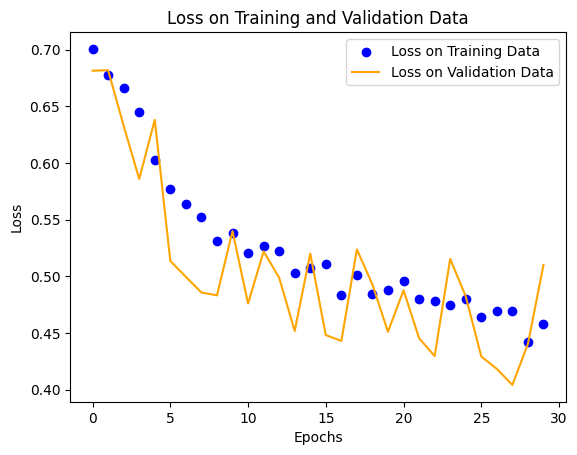

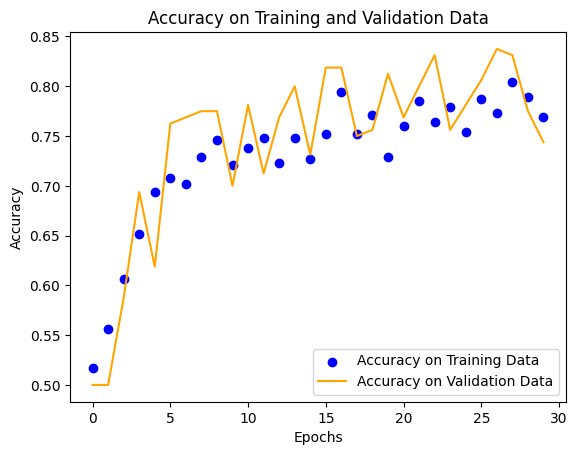

In [11]:
epochs = range(len(history.history['loss']))
loss = history.history['loss']
val_loss = history.history['val_loss']
# plotting loss
plt.scatter(epochs, loss, color='blue', label='Loss on Training Data')
plt.plot(epochs, val_loss, color='orange', label='Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
# plotting accuracy
plt.scatter(epochs, acc, color='blue', label='Accuracy on Training Data')
plt.plot(epochs, val_acc, color='orange', label='Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Model prediction**

# Model prediction using test data

In [12]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [13]:
result = model.evaluate(test_generator)
print("test loss, test accuracy:", result)

8/8 [==============================] - 36s 5s/step - loss: 0.5576 - acc: 0.6938
test loss, test accuracy: [0.5576111674308777, 0.6937500238418579]


In [15]:
predict = model.predict(test_generator, steps=test_generator.samples)
predict

  8/160 [>.............................] - ETA: 41s

160/160 [==============================] - 2s 12ms/step


array([[0.45514137],
       [0.45241156],
       [0.23648101],
       [0.08080283],
       [0.27175045],
       [0.42343405],
       [0.08400634],
       [0.9652024 ],
       [0.9664005 ],
       [0.03040727],
       [0.10334257],
       [0.326623  ],
       [0.09302439],
       [0.12161399],
       [0.12582259],
       [0.2954069 ],
       [0.15688778],
       [0.40011737],
       [0.44898593],
       [0.06143926],
       [0.12845522],
       [0.3865024 ],
       [0.14435513],
       [0.17499937],
       [0.85058284],
       [0.3978841 ],
       [0.06833445],
       [0.10478429],
       [0.65965   ],
       [0.30300036],
       [0.6780208 ],
       [0.11351918],
       [0.21035409],
       [0.11121347],
       [0.29561278],
       [0.60934824],
       [0.4572523 ],
       [0.10156023],
       [0.9494259 ],
       [0.9952944 ],
       [0.24370041],
       [0.09512978],
       [0.1265637 ],
       [0.22050871],
       [0.47707966],
       [0.23757659],
       [0.6836543 ],
       [0.100

In [16]:
predicted_labels = np.where(predict > 0.5, 1, 0).flatten()

true_labels = test_generator.classes

df_test = pd.DataFrame({
    'file': test_generator.filenames,
    'true_label': true_labels,
    'predicted_label': predicted_labels
})

print(df_test)

                         file  true_label  predicted_label
0     no_panel/no_panel_0.png           0                0
1     no_panel/no_panel_1.png           0                0
2    no_panel/no_panel_10.png           0                0
3    no_panel/no_panel_11.png           0                0
4    no_panel/no_panel_12.png           0                0
..                        ...         ...              ...
155       panels/panel_81.png           1                0
156       panels/panel_82.png           1                0
157       panels/panel_87.png           1                0
158       panels/panel_89.png           1                0
159       panels/panel_94.png           1                1

[160 rows x 3 columns]


## Building a confusion matrix

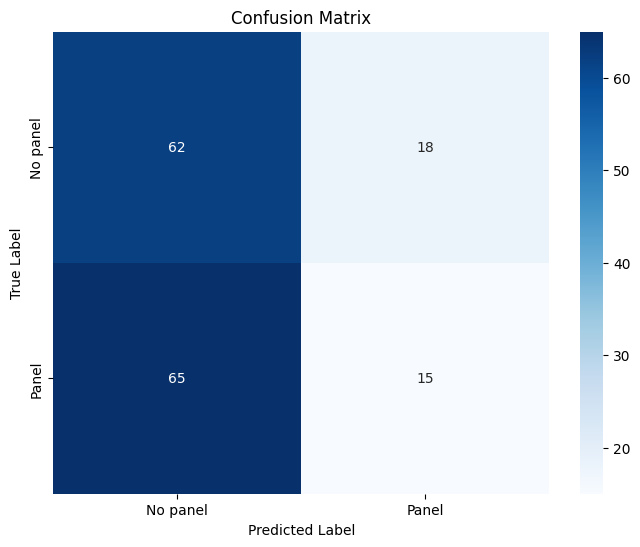

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df_test['true_label'], df_test['predicted_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No panel', 'Panel'], yticklabels=['No panel', 'Panel'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model optimization

In [18]:
# increasing batchsize from 20 to 64
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'binary'
)

Found 480 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (64, 150, 150, 3)
labels batch shape (64,)


In [20]:
# Define the model
model = tf.keras.models.Sequential()

# Added 4 layers, dropout = 0.5
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [22]:
history = model.fit(
    train_generator,
    epochs=60,
    validation_data = validation_generator,
)

Epoch 1/60
8/8 [==============================] - 55s 7s/step - loss: 0.7321 - acc: 0.4854 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 2/60
8/8 [==============================] - 50s 6s/step - loss: 0.6903 - acc: 0.5042 - val_loss: 0.6774 - val_acc: 0.5000
Epoch 3/60
8/8 [==============================] - 46s 5s/step - loss: 0.6844 - acc: 0.5271 - val_loss: 0.6208 - val_acc: 0.6250
Epoch 4/60
8/8 [==============================] - 39s 4s/step - loss: 0.6258 - acc: 0.6812 - val_loss: 0.5336 - val_acc: 0.7937
Epoch 5/60
8/8 [==============================] - 35s 4s/step - loss: 0.5418 - acc: 0.7417 - val_loss: 0.5017 - val_acc: 0.7750
Epoch 6/60
8/8 [==============================] - 35s 4s/step - loss: 0.5074 - acc: 0.7500 - val_loss: 0.6064 - val_acc: 0.6938
Epoch 7/60
8/8 [==============================] - 38s 4s/step - loss: 0.5193 - acc: 0.7417 - val_loss: 0.4728 - val_acc: 0.8062
Epoch 8/60
8/8 [==============================] - 35s 5s/step - loss: 0.4789 - acc: 0.7729 - val_loss: 0

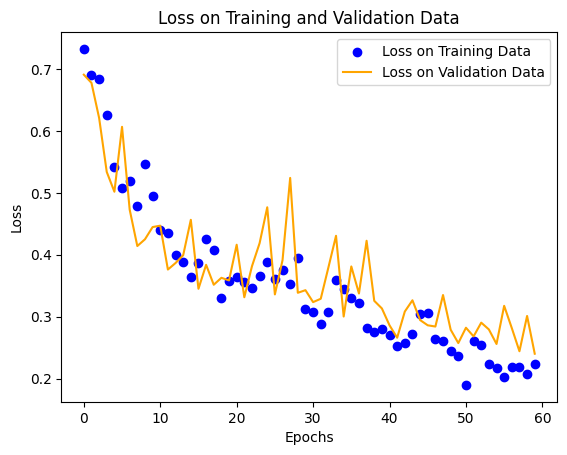

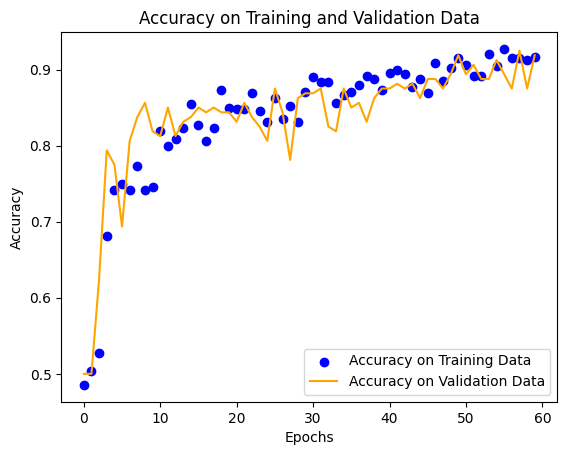

In [23]:
epochs = range(len(history.history['loss']))
loss = history.history['loss']
val_loss = history.history['val_loss']

# plotting loss
plt.scatter(epochs, loss, color='blue', label='Loss on Training Data')
plt.plot(epochs, val_loss, color='orange', label='Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.scatter(epochs, acc, color='blue', label='Accuracy on Training Data')
plt.plot(epochs, val_acc, color='orange', label='Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)


Found 160 images belonging to 2 classes.


In [25]:
result = model.evaluate(test_generator)
print("test loss, test accuracy:", result)

3/3 [==============================] - 4s 642ms/step - loss: 0.2681 - acc: 0.8938
test loss, test accuracy: [0.268093466758728, 0.893750011920929]


In [26]:
predict = model.predict(test_generator, steps=test_generator.samples)
predict

  3/160 [..............................] - ETA: 2:14

160/160 [==============================] - 4s 11ms/step


array([[0.3530893 ],
       [0.02731441],
       [0.9893045 ],
       [0.82604516],
       [0.99999875],
       [0.8480839 ],
       [1.        ],
       [0.99999464],
       [0.99225014],
       [0.00920212],
       [0.00768124],
       [0.04562306],
       [0.33433688],
       [0.9999649 ],
       [0.03608979],
       [0.9997038 ],
       [1.        ],
       [0.98205405],
       [0.8911433 ],
       [0.97432965],
       [0.35394394],
       [0.10164867],
       [0.7668718 ],
       [0.03178519],
       [0.06459597],
       [0.01988117],
       [0.03723754],
       [0.04529896],
       [0.23775384],
       [0.892798  ],
       [0.71150905],
       [0.8753272 ],
       [0.00234468],
       [0.99021316],
       [0.9998622 ],
       [0.05771241],
       [0.05710404],
       [0.01958406],
       [0.01182235],
       [0.9998919 ],
       [0.9999986 ],
       [0.24276656],
       [0.9738432 ],
       [0.02886841],
       [0.9999991 ],
       [0.99974006],
       [0.99985725],
       [0.018

In [30]:
predicted_labels = np.where(predict > 0.5, 1, 0).flatten()

true_labels = test_generator.classes

df_test1 = pd.DataFrame({
    'file': test_generator.filenames,
    'true_label': true_labels,
    'predicted_label': predicted_labels
})

print(df_test1)

                         file  true_label  predicted_label
0     no_panel/no_panel_0.png           0                0
1     no_panel/no_panel_1.png           0                0
2    no_panel/no_panel_10.png           0                1
3    no_panel/no_panel_11.png           0                1
4    no_panel/no_panel_12.png           0                1
..                        ...         ...              ...
155       panels/panel_81.png           1                1
156       panels/panel_82.png           1                0
157       panels/panel_87.png           1                0
158       panels/panel_89.png           1                0
159       panels/panel_94.png           1                0

[160 rows x 3 columns]


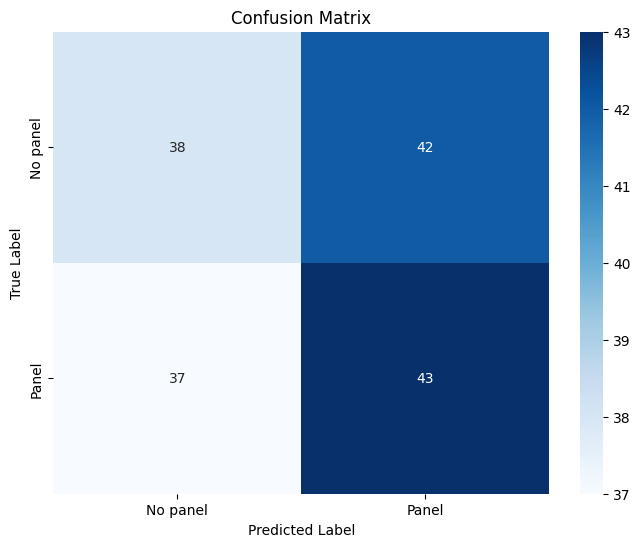

In [31]:
cm = confusion_matrix(df_test1['true_label'], df_test1['predicted_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No panel', 'Panel'], yticklabels=['No panel', 'Panel'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()